# import

In [487]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import os
from sklearn.model_selection import train_test_split
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [488]:
RANDOM_SEED = 42

In [489]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [490]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [491]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [492]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [493]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [494]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [495]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [496]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [497]:
# для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1  # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
# в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0

data = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # объединяем

In [498]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [499]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
26955,id_286,Luxembourg,['French'],287.0,$,9.0,"[['Tasty but...', 'Boulangerie Grevig / Luxemb...",/Restaurant_Review-g190356-d7887014-Reviews-Bo...,d7887014,1,5.0
48583,id_1129,Hamburg,NaN,1131.0,NaN,31.0,"[['Good athmosphere, nice dinner.', 'Great res...",/Restaurant_Review-g187331-d1347840-Reviews-Re...,d1347840,1,4.5
29891,id_2621,Lisbon,NaN,2624.0,NaN,5.0,"[[], []]",/Restaurant_Review-g189158-d10135970-Reviews-S...,d10135970,1,4.0
19538,id_3784,London,"['Japanese', 'Asian', 'Korean', 'Taiwanese', '...",3791.0,$$ - $$$,65.0,"[['Terrific Views', 'Nice cosy Chinese restaur...",/Restaurant_Review-g186338-d10073432-Reviews-K...,d10073432,1,4.5
46058,id_5226,Madrid,['Spanish'],5229.0,NaN,7.0,"[['Genuine joint'], ['10/14/2015']]",/Restaurant_Review-g187514-d6903024-Reviews-Ba...,d6903024,1,4.0


In [500]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

## 1. Обработка NAN 


In [501]:
data['Number of Reviews'].isna().value_counts()

False    46800
True      3200
Name: Number of Reviews, dtype: int64

In [502]:
# Далее заполняем пропуски 0
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [503]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

In [504]:
data = pd.get_dummies(data, columns=['City', ], dummy_na=True)

In [505]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [506]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
16242,id_1784,"['Asian', 'Halal']",1788.0,$$ - $$$,12.0,[['Looking for that Sunday night kick to your....,/Restaurant_Review-g186605-d696366-Reviews-Bu_...,d696366,1,3.0,...,0,0,0,0,0,0,0,0,0,0
33395,id_559,"['European', 'Portuguese']",560.0,$$ - $$$,15.0,"[['Traditional Portuguese Dishes, Exellent Qu....",/Restaurant_Review-g190356-d1886408-Reviews-Fa...,d1886408,1,3.0,...,0,0,0,0,0,0,0,0,0,0
35809,id_4147,"['Italian', 'Mediterranean']",4148.0,$$ - $$$,76.0,"[['One of the best Pizza Places in Paris', 'Si...",/Restaurant_Review-g187147-d4597730-Reviews-Bi...,d4597730,1,4.5,...,0,0,1,0,0,0,0,0,0,0
5816,id_5816,NaN,1269.0,NaN,0.0,[['Genuine Chinese cuisine in the heart of Du....,/Restaurant_Review-g186605-d10154475-Reviews-N...,d10154475,0,0.0,...,0,0,0,0,0,0,0,0,0,0
11302,id_5815,"['Japanese', 'Sushi']",5818.0,NaN,111.0,"[[], []]",/Restaurant_Review-g187849-d1012032-Reviews-Ci...,d1012032,1,3.0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [507]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [508]:
data['price'] = data['Price Range'].replace(
    {'$$ - $$$': '2', '$': '1', '$$$$': '3'})
data['price'] = pd.to_numeric(data['price'])

In [509]:
# тут ваш код на обработку других признаков
# .....

# EDA 


### Посмотрим распределение признака

<AxesSubplot:>

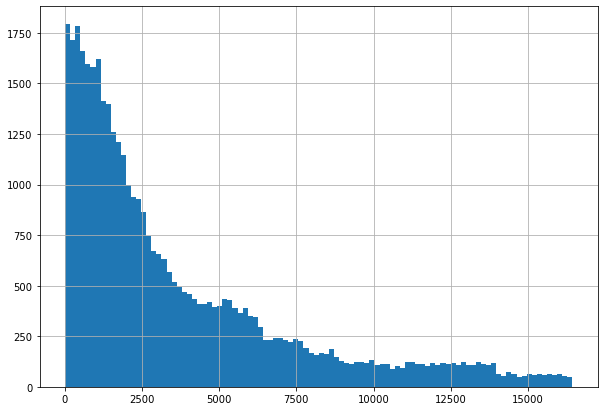

In [510]:
plt.rcParams['figure.figsize'] = (10, 7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

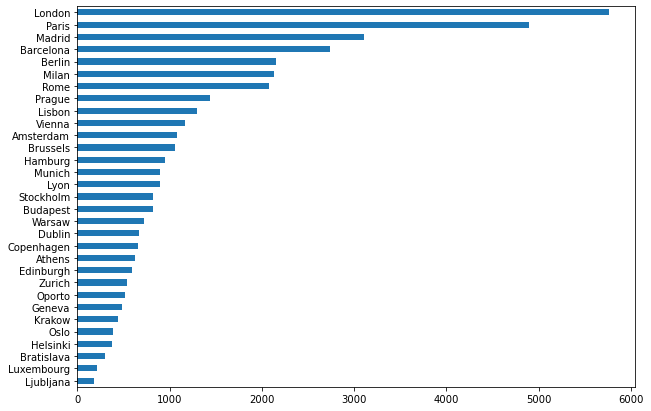

In [511]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

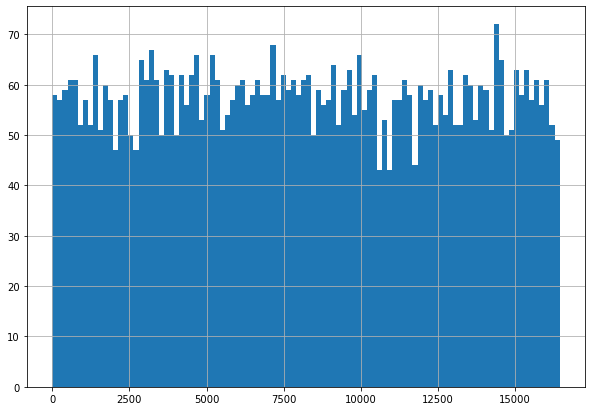

In [512]:
df_train['Ranking'][df_train['City'] == 'London'].hist(bins=100)

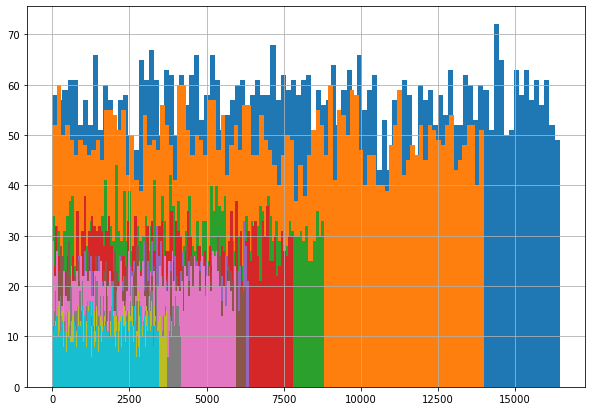

In [513]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

### Посмотрим распределение целевой переменной

<AxesSubplot:>

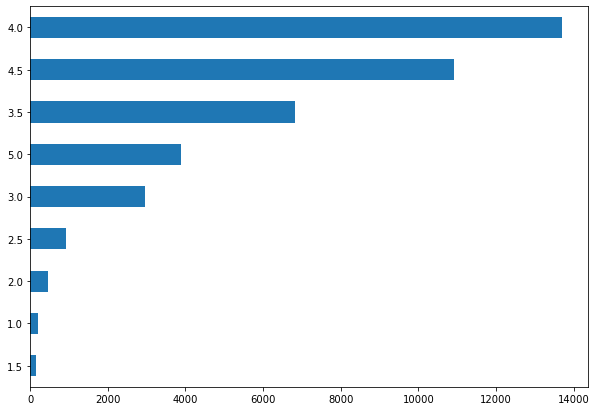

In [514]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

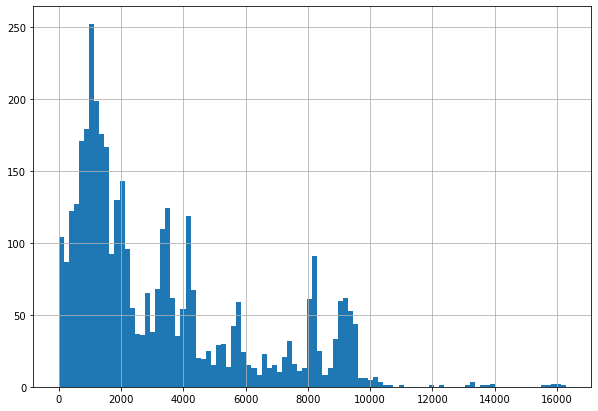

In [515]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

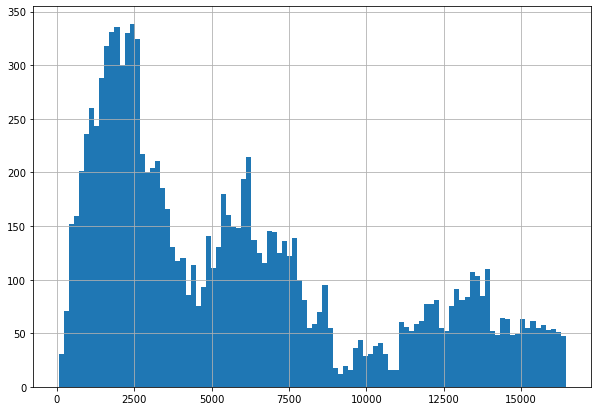

In [516]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

<AxesSubplot:>

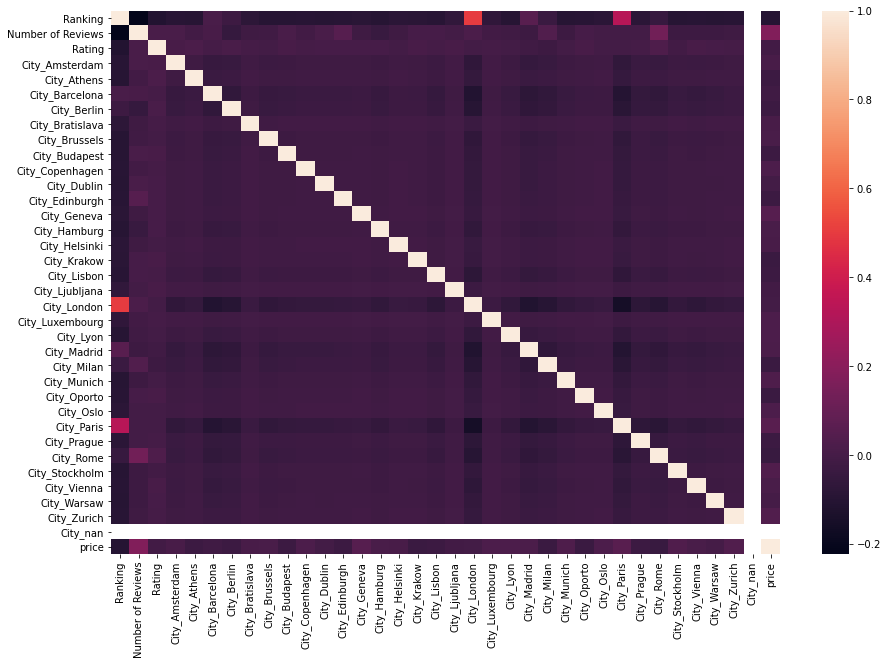

In [517]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [557]:
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [589]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1  # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
# в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0

data = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [590]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''

    df_output = df_input.copy()

    # ################### 1. Предобработка ##############################################################
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id', 'ID_TA', ], axis=1, inplace=True)

    # ################### 2. NAN ##############################################################
    # Далее заполняем пропуски
    df_output['Number of Reviews'].fillna(0, inplace=True)

    # ################### 3. Encoding ##############################################################
    res_count_per_city = df_output.groupby('City')['Ranking'].count().to_dict()
    df_output['rests_in_city'] = df_output['City'].map(res_count_per_city)
    df_output['ranking_per_city'] = df_output['Ranking'] / \
        df_output['rests_in_city']
    df_output = pd.get_dummies(df_output, columns=['City', ], dummy_na=True)

    # ################### 4. Feature Engineering ####################################################
    # Заменяю параметр ценовой категории
    df_output['price'] = df_output['Price Range'].replace(
        {'$$ - $$$': '2', '$': '1', '$$$$': '3'})
    df_output['price'] = pd.to_numeric(df_output['price'])
    df_output['price'].fillna(2, inplace=True)
    #####################################
    # анализирую характер отзыва
    df_output['Reviews'] = df_output['Reviews'].apply(
        lambda x: str(x).replace('[', ''))
    df_output['Reviews'] = df_output['Reviews'].apply(
        lambda x: str(x).replace(']', ''))
    df_output['Reviews'] = df_output['Reviews'].apply(lambda x: x.split(','))
    exc_review = ['very good', 'excellent',
                  'amazing', 'great', 'best', 'wonderful']
    good_review = ['good', 'nice', 'ok', 'okay', 'lovely']
    bad_review = ['boring', 'bad', 'nothing',   'sad', 'overprice', 'wasting']

    def good(x):
        for i in good_review:
            if i in str(x):
                return 30
        else:
            return 0

    def exc(x):
        for i in exc_review:
            if i in str(x):
                return 100
        else:
            return 0

    def bad(x):
        for i in bad_review:
            if i in str(x):
                return -20
        else:
            return 0
    df_output['exc_rev'] = df_output['Reviews'].apply(exc)
    df_output['good_rev'] = df_output['Reviews'].apply(good)
    df_output['bad_rev'] = df_output['Reviews'].apply(bad)
    df_output['Review_ranked'] = (
        df_output['exc_rev']+df_output['good_rev']+df_output['bad_rev'])/3
    ##############################################
    # анализирую стиль кухни
    df_output['Cuisine Style'].fillna('Vegetarian Friendly')
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
        lambda x: str(x).replace('[', ''))
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
        lambda x: str(x).replace(']', ''))
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
        lambda x: str(x).replace(' ', ''))
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
        lambda x: x.split(','))
    cus_mean = round(df_output['Cuisine Style'].apply(
        lambda x: len(x)).mean(), 1)
    df_output['Cuisine Style Number'] = df_output['Cuisine Style'].apply(
        lambda x: len(x))

    # ################### 5. Clean ####################################################
    # убираем признаки которые еще не успели обработать,
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [
        s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis=1, inplace=True)

    return df_output

#### Запускаем и проверяем что получилось

In [591]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,rests_in_city,ranking_per_city,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,price,exc_rev,good_rev,bad_rev,Review_ranked,Cuisine Style Number
7109,4461.0,62.0,0,0.0,6108,0.730354,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,2
37046,6683.0,2.0,1,3.5,3813,1.752688,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,1
43207,455.0,406.0,1,4.5,3395,0.134021,0,0,1,0,...,0,0,0,0,2.0,0,0,0,0.000000,9
9703,1308.0,28.0,0,0.0,1033,1.266215,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,4
10418,12374.0,0.0,1,4.0,7193,1.720284,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,1
36457,738.0,33.0,1,5.0,745,0.990604,0,0,0,0,...,0,0,0,0,1.0,0,0,0,0.000000,3
4743,12660.0,2.0,0,0.0,6108,2.072692,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,1
16754,2716.0,5.0,1,4.0,1816,1.495595,0,0,0,0,...,0,0,0,0,2.0,0,30,0,10.000000,2
41006,901.0,39.0,1,4.5,1126,0.800178,0,0,0,0,...,0,0,0,0,1.0,0,0,0,0.000000,1
20464,6113.0,22.0,1,4.5,7193,0.849854,0,0,0,0,...,0,0,0,0,2.0,100,0,0,33.333333,5


In [592]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ranking               50000 non-null  float64
 1   Number of Reviews     50000 non-null  float64
 2   sample                50000 non-null  int64  
 3   Rating                50000 non-null  float64
 4   rests_in_city         50000 non-null  int64  
 5   ranking_per_city      50000 non-null  float64
 6   City_Amsterdam        50000 non-null  uint8  
 7   City_Athens           50000 non-null  uint8  
 8   City_Barcelona        50000 non-null  uint8  
 9   City_Berlin           50000 non-null  uint8  
 10  City_Bratislava       50000 non-null  uint8  
 11  City_Brussels         50000 non-null  uint8  
 12  City_Budapest         50000 non-null  uint8  
 13  City_Copenhagen       50000 non-null  uint8  
 14  City_Dublin           50000 non-null  uint8  
 15  City_Edinburgh     

In [593]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [594]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

In [595]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 43), (40000, 43), (40000, 42), (32000, 42), (8000, 42))

# Model 
Сам ML

In [596]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [597]:
# Создаём модель
model = RandomForestRegressor(
    n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [598]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [599]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20928375


<AxesSubplot:>

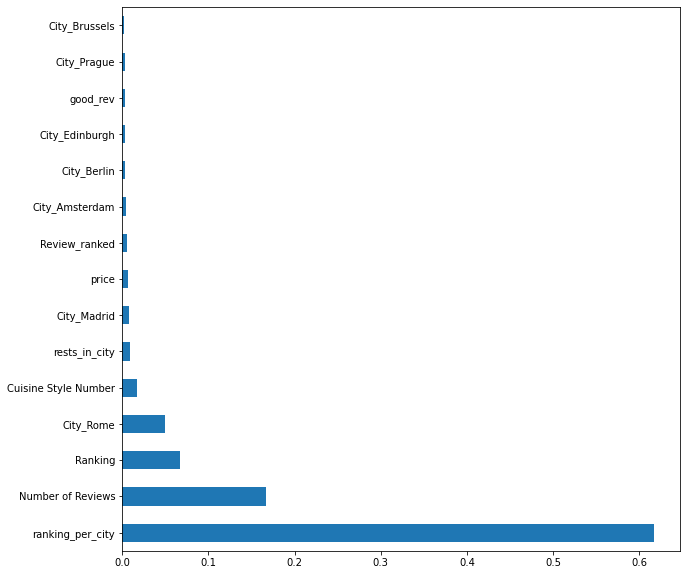

In [600]:
# RandomForestRegressor
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission


In [601]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,rests_in_city,ranking_per_city,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,price,exc_rev,good_rev,bad_rev,Review_ranked,Cuisine Style Number
2284,4362.0,5.0,0.0,2694,1.619154,0,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,1
9394,121.0,115.0,0.0,590,0.205085,0,0,0,0,0,...,0,0,0,0,3.0,100,0,0,33.333333,5
674,3160.0,30.0,0.0,3813,0.828744,0,0,0,0,0,...,0,0,0,0,1.0,0,0,-20,-6.666667,2
2342,2439.0,31.0,0.0,2589,0.942063,0,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,1
6736,1661.0,0.0,0.0,925,1.795676,0,0,0,0,0,...,0,1,0,0,2.0,0,0,0,0.000000,2
3588,2.0,1092.0,0.0,554,0.003610,0,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,6
1975,3802.0,30.0,0.0,3395,1.119882,0,0,1,0,0,...,0,0,0,0,1.0,0,0,0,0.000000,3
838,14221.0,3.0,0.0,7193,1.977061,0,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,1
2576,543.0,108.0,0.0,1314,0.413242,0,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,4
5787,4428.0,33.0,0.0,6108,0.724951,0,0,0,0,0,...,0,0,0,0,2.0,0,0,0,0.000000,1


In [602]:
test_data = test_data.drop(['Rating'], axis=1)

In [603]:
sample_submission

,Restaurant_id,Rating
0,id_0,3.025
1,id_1,4.245
2,id_2,4.525
3,id_3,4.240
4,id_4,4.440
...,...,...
9995,id_9995,4.460
9996,id_9996,4.145
9997,id_9997,3.040
9998,id_9998,4.495


In [604]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [605]:
predict_submission

array([3.025, 4.245, 4.525, ..., 3.04 , 4.495, 4.255])

In [606]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission_now.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.025
1,id_1,4.245
2,id_2,4.525
3,id_3,4.240
4,id_4,4.440
5,id_5,4.570
6,id_6,2.255
7,id_7,2.445
8,id_8,4.090
9,id_9,4.690
